In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

## Association Mining Frequent Skills

In [ ]:
df = pd.read_csv('internshala_clean.csv')
df.head(3)

,location,domain_profile,company_name,about_the_work_from_home_job/internship,skills,who_can_apply,other_requirements,perks,number_of_openings,company_details,...,WordPress,XML,Xamarin,Xcode,Yii,iOS,jQuery,min_stipend,max_stipend,mean_stipend
0,Work From Home,Embedded Android Development,Augrade Private Limited,Selected intern's day-to-day responsibilities ...,Java\nLinux\nEmbedded Systems\nC Programming\n...,Only those candidates can apply who:\n1. are a...,1. Experience in hands-on development and trou...,Certificate\n Flexible work hours\n 5 days a week,2,"At Augrade, we work to rethink tomorrow and im...",...,0,0,0,0,0,0,0,8000,15000,11500.0
1,Work From Home,Technical Project Management,Zansys Technologies,Selected intern's day-to-day responsibilities ...,PHP\nSoftware Testing\nReactJS,Only those candidates can apply who:\n1. are a...,NaN,Certificate\n 5 days a week,1,Website\nZansys Technologies is a software ser...,...,0,0,0,0,0,0,0,10000,10000,10000.0
2,Work From Home,Full Stack Development (Web+Flutter),Rising Youth Foundation,Selected intern's day-to-day responsibilities ...,MongoDB\nNode.js\nFlutter\nREST API\nDart\nAnd...,Only those candidates can apply who:\n1. are a...,NaN,Certificate\n Letter of recommendation,1,Facebook page\nRising Youth Foundation is an A...,...,0,0,0,0,0,0,0,4500,8000,6250.0


#### Skills Feature Analysis

Skills feature consists of values in form of newline seperated('\n') list of skills.

In [ ]:
# Skills Features
df.skills[:10]

0    Java\nLinux\nEmbedded Systems\nC Programming\n...
1                       PHP\nSoftware Testing\nReactJS
2    MongoDB\nNode.js\nFlutter\nREST API\nDart\nAnd...
3    HTML\nCSS\nJavaScript\njQuery\nMS-Office\nWord...
4                       HTML\nCSS\nReact Native\nRedux
5    HTML\nCSS\nJavaScript\nBootstrap\nNode.js\nRea...
6             WordPress\nEnglish Proficiency (Written)
7                           JavaScript\nReactJS\nRedux
8                                                  NaN
9                   HTML\nCSS\nJavaScript\nMathematics
Name: skills, dtype: object

#### Creating list of list of individual skills for each row

In [ ]:
super_skills_list = []
def aggregate_skills(series):
    if(type(series) == str):
        skills = series.split('\n')
        super_skills_list.append(skills)

df.skills.agg(aggregate_skills)

0       None
1       None
2       None
3       None
4       None
        ... 
2369    None
2370    None
2371    None
2372    None
2373    None
Name: skills, Length: 2374, dtype: object

### Applying FP Growth Algoritm on Skills

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(super_skills_list).transform(super_skills_list)
freq_skills_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(freq_skills_df, min_support=0.05, use_colnames=True)

In [ ]:
frequent_itemsets.sort_values(by='support', ascending=True)

,support,itemsets
35,0.050645,"(Node.js, CSS, HTML)"
30,0.050645,"(JavaScript, CSS, PHP, HTML)"
44,0.050645,"(ReactJS, React Native)"
22,0.051601,"(ReactJS, JavaScript, HTML)"
29,0.053512,"(JavaScript, CSS, PHP)"
45,0.053989,"(MySQL, PHP)"
28,0.055423,"(JavaScript, PHP, HTML)"
34,0.055901,"(Node.js, HTML)"
33,0.056378,"(Node.js, CSS)"
8,0.056378,(Firebase)


#### Assocation Rules Mining

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

In [ ]:
rules_df.sort_values(by='confidence', ascending=False, inplace=True)
rules_df.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,"(CSS, PHP)",(HTML),0.081223,0.281414,0.077401,0.952941,3.386258,0.054544,15.269947
42,"(JavaScript, CSS, PHP)",(HTML),0.053512,0.281414,0.050645,0.946429,3.363115,0.035586,13.413601
78,"(JavaScript, CSS)",(HTML),0.166269,0.281414,0.154802,0.931034,3.308413,0.108011,10.419494
88,"(CSS, Bootstrap)",(HTML),0.061156,0.281414,0.056378,0.921875,3.275865,0.039168,9.197898
74,(CSS),(HTML),0.250836,0.281414,0.229814,0.916190,3.255665,0.159225,8.574035
44,"(JavaScript, PHP, HTML)",(CSS),0.055423,0.250836,0.050645,0.913793,3.642989,0.036743,8.690301
65,"(Node.js, HTML)",(CSS),0.055901,0.250836,0.050645,0.905983,3.611852,0.036623,7.968379
90,"(Bootstrap, HTML)",(CSS),0.062590,0.250836,0.056378,0.900763,3.591043,0.040679,7.549267
64,"(Node.js, CSS)",(HTML),0.056378,0.281414,0.050645,0.898305,3.192110,0.034779,7.066093
12,"(ReactJS, CSS)",(HTML),0.071190,0.281414,0.063545,0.892617,3.171899,0.043511,6.691830


### Graphical Representation of top rules

In [ ]:
rules_df.antecedents = rules_df.antecedents.apply(lambda s: ','.join([x for x in s]))
rules_df.consequents = rules_df.consequents.apply(lambda s: ','.join([x for x in s]))

<Figure size 1296x72 with 0 Axes>

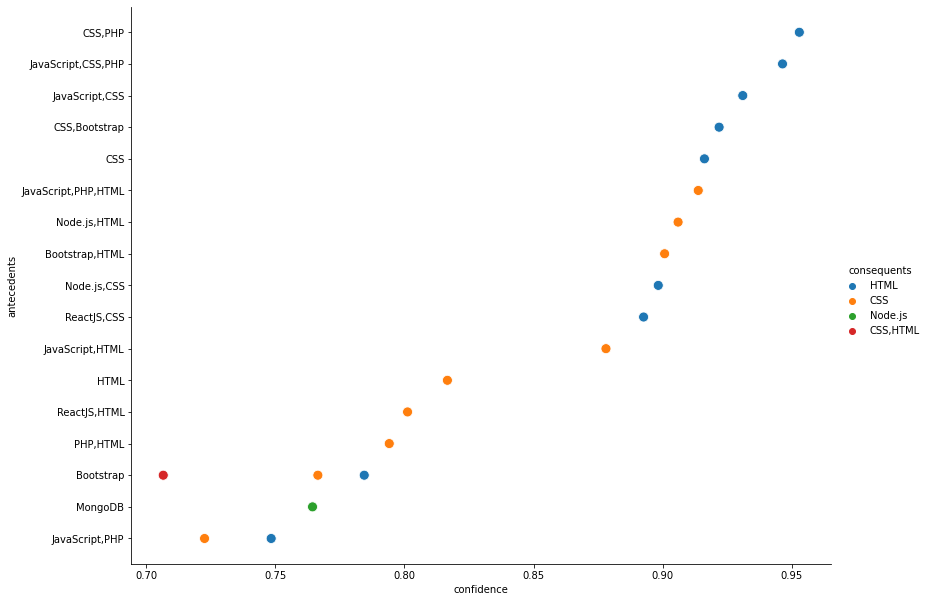

In [ ]:
plt.figure(figsize=(18,1))
sns.relplot(data=rules_df[:20], y='antecedents' , x='confidence', hue='consequents', s=100,  height=8.27, aspect=11.7/8.27)

## Conclusion

We see that HTML, CSS, NODE.JS are most frequest skills. Top 4 rules convey that HTML is quite popular tool when antecedents includes PHP, CSS, JAVASCRIPT, etc

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74369ce2-fcab-46fa-9e44-ec96a35fc584' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>